In [56]:
import numpy as np
import sys 
import os
import shutil
import matplotlib.pyplot as plt
sys.path.append('/home/giorgiod/Documents/APDFT/dep')
sys.path.append('/home/giorgiod/Documents/APDFT/src')

In [2]:
from apdft import Calculator

In [13]:
proj_path='/home/giorgiod/MRCC_interface/PES-BS-ALCHEMY/'

In [42]:
basisSets=os.listdir(proj_path)
molecules=['NN','CO','BeNe','BF','HeMg','LiNa','HAl']
alchemy=[-2,-1,0,1,2]
points= np.linspace(1.30,3.20,20)
def dirName(basis_set,molecule,point,alchemy=0):
    return proj_path+basis_set+'/'+molecule+"/A{}_Radius:{}".format(alchemy,str(point)[0:3])+'/'
print (os.path.isdir(dirName(basisSets[3],molecules[2],points[3])))
print (dirName(basisSets[3],molecules[2],points[3]))

True
/home/giorgiod/MRCC_interface/PES-BS-ALCHEMY/sto3G/BeNe/A0_Radius:1.6/


In [53]:
def parse_energy_cc(log_file):
    """Parse the couple cluster energy from an MRCC output file"""
    try:
        with open(log_file,'r') as logf:
            while True:
                line=logf.readline()
                if "Final results:" in line:
                    good_line=logf.readline()
                    if "Total CCSD energy" in good_line:
                        for x in good_line.split(' '):
                            try:
                                float(x)
                                return (float(x))
                            except:
                                pass    
    except:
        print('couldn\'t parse energy return 0 for: '+log_file)
        return 0

In [45]:
def energy(bs,mol,pt,al=0):
    return parse_energy_cc(dirName(bs,mol,pt,al)+'run.log')

In [49]:
energy('sto3G','HAl',2.2)

-239.440871523172

In [55]:
for bs in basisSets:
    for mol in molecules:
        print (energy(bs,mol,2.1))
        print (dirName(bs,mol,2.1))

couldn't parse energy return 0 for: /home/giorgiod/MRCC_interface/PES-BS-ALCHEMY/def2-QZVPP/NN/A0_Radius:2.1/run.log
0
/home/giorgiod/MRCC_interface/PES-BS-ALCHEMY/def2-QZVPP/NN/A0_Radius:2.1/
couldn't parse energy return 0 for: /home/giorgiod/MRCC_interface/PES-BS-ALCHEMY/def2-QZVPP/CO/A0_Radius:2.1/run.log
0
/home/giorgiod/MRCC_interface/PES-BS-ALCHEMY/def2-QZVPP/CO/A0_Radius:2.1/
couldn't parse energy return 0 for: /home/giorgiod/MRCC_interface/PES-BS-ALCHEMY/def2-QZVPP/BeNe/A0_Radius:2.1/run.log
0
/home/giorgiod/MRCC_interface/PES-BS-ALCHEMY/def2-QZVPP/BeNe/A0_Radius:2.1/
couldn't parse energy return 0 for: /home/giorgiod/MRCC_interface/PES-BS-ALCHEMY/def2-QZVPP/BF/A0_Radius:2.1/run.log
0
/home/giorgiod/MRCC_interface/PES-BS-ALCHEMY/def2-QZVPP/BF/A0_Radius:2.1/
couldn't parse energy return 0 for: /home/giorgiod/MRCC_interface/PES-BS-ALCHEMY/def2-QZVPP/HeMg/A0_Radius:2.1/run.log
0
/home/giorgiod/MRCC_interface/PES-BS-ALCHEMY/def2-QZVPP/HeMg/A0_Radius:2.1/
couldn't parse energy retur

couldn't parse energy return 0 for: /home/giorgiod/MRCC_interface/PES-BS-ALCHEMY/cc-pVTZ/HAl/A0_Radius:2.1/run.log
0
/home/giorgiod/MRCC_interface/PES-BS-ALCHEMY/cc-pVTZ/HAl/A0_Radius:2.1/
couldn't parse energy return 0 for: /home/giorgiod/MRCC_interface/PES-BS-ALCHEMY/aug-cc-pVQZ/NN/A0_Radius:2.1/run.log
0
/home/giorgiod/MRCC_interface/PES-BS-ALCHEMY/aug-cc-pVQZ/NN/A0_Radius:2.1/
couldn't parse energy return 0 for: /home/giorgiod/MRCC_interface/PES-BS-ALCHEMY/aug-cc-pVQZ/CO/A0_Radius:2.1/run.log
0
/home/giorgiod/MRCC_interface/PES-BS-ALCHEMY/aug-cc-pVQZ/CO/A0_Radius:2.1/
couldn't parse energy return 0 for: /home/giorgiod/MRCC_interface/PES-BS-ALCHEMY/aug-cc-pVQZ/BeNe/A0_Radius:2.1/run.log
0
/home/giorgiod/MRCC_interface/PES-BS-ALCHEMY/aug-cc-pVQZ/BeNe/A0_Radius:2.1/
couldn't parse energy return 0 for: /home/giorgiod/MRCC_interface/PES-BS-ALCHEMY/aug-cc-pVQZ/BF/A0_Radius:2.1/run.log
0
/home/giorgiod/MRCC_interface/PES-BS-ALCHEMY/aug-cc-pVQZ/BF/A0_Radius:2.1/
couldn't parse energy retur

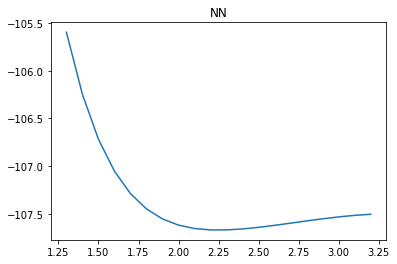

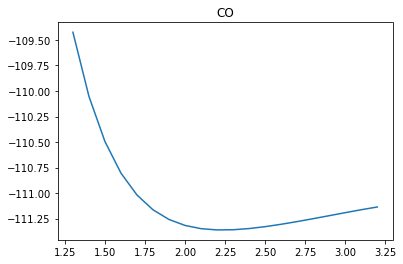

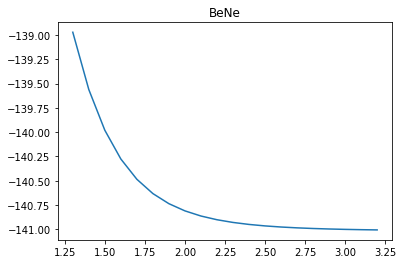

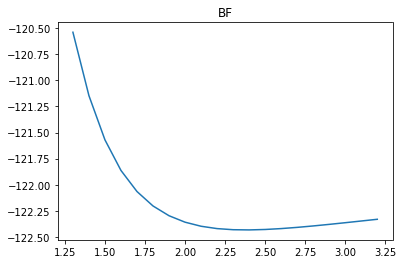

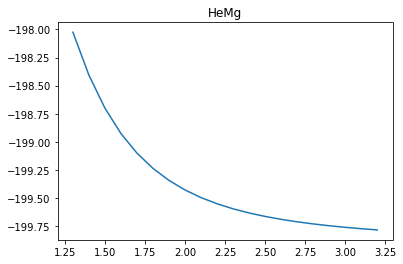

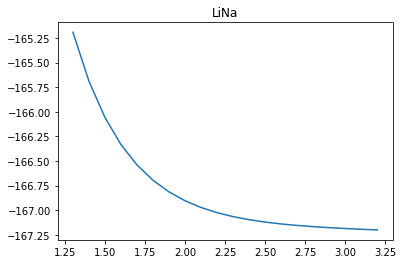

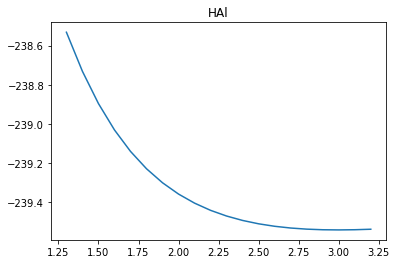

In [59]:
for mol in molecules:
    plt.plot(points,[energy('sto3G',mol,pt) for pt in points])
    plt.title(mol)
    plt.show()